In [1]:
import pandas as pd
#%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import glob
from sklearn import preprocessing
import seaborn as sns
import matplotlib.dates as mdates

**DATA8 - Statistics for Machine Learning - part 2**

Projet = Consommation et production électrique en France

**Objectifs**
<font color=#339966> 

1. Manipulation de données avec pandas
    - Création des dataframes à partir des fichiers RTE
    - Exploration des données contenues dans ces dataframes   
    
    
2. Etude des relations entre variables

</font> 

**Conseils généraux:**
<font color=#0033cc>
- Afficher les premières lignes de la variables que vous êtes en train d'étudier peut vous aider à comprendre bien des problèmes (méthode 'head' de Pandas)
- Lorsque c'est nécessaire (selon ce que vous cherchez) penser à normaliser/standardiser les données
- C'est une analyse exploratoire: tatonnez, plotez, ... 
- Ne pas hésiter à consulter l'aide de Pandas ou à chercher la réponse à vos questions sur internet..
</font>


# Data exploration

An EDA checklist

1. What question(s) are you trying to solve / prove wrong ?
2. What kind of data do you have and how do you treat different types ?
3. What’s missing from the data and how do you deal with it ?
4. Where are the outliers and why should you care about them ?
5. How can you add, change or remove features to get more out of your data ?
        
https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 8
sns.set_palette(sns.color_palette("hls", 12))

**Objectifs**
<font color='green'>
    
1. Charger et nettoyer des données: read_csv, parse date, concat
2. Manipuler les données pour mieux les comprendre: groupby, pivot, stack/unstack

</font>

## Création des dataframe

### Données nationales 

In [4]:
path='../DATA/data_RTE/conso' # use your path
fichier_nationaux = glob.glob(path + "/eCO2mix_RTE_Annuel-Definitif*.zip")

li = []

for filename in fichier_nationaux:
    df = pd.read_csv(filename, sep='\t' , encoding='latin_1', index_col = False,na_values='ND')
    li.append(df)

df_national = pd.concat(li, axis=0, ignore_index=True,sort=False)

df_national['Datetime']=df_national['Date']+' '+df_national['Heures']
df_national['Datetime']=pd.to_datetime(df_national['Datetime'])
df_national.index=df_national['Datetime']
df_national=df_national.drop(['Date', 'Heures','Périmètre','Nature','Datetime'], axis=1)

In [5]:
df_national.iloc[:5]

,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
Datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,74494.0,72900.0,73700.0,269.0,2487.0,3476.0,57982.0,1268.0,0.0,9321.0,...,3.0,2056.0,1350.0,66.0,4810.0,3093.0,1418.0,560.0,181.0,197.0
2015-01-01 00:15:00,NaN,72250.0,73050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:30:00,73481.0,71600.0,72400.0,319.0,2087.0,2691.0,57856.0,1343.0,-1.0,9664.0,...,9.0,1926.0,670.0,86.0,4616.0,3561.0,1487.0,507.0,180.0,210.0
2015-01-01 00:45:00,NaN,70750.0,71500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,71506.0,69900.0,70600.0,320.0,1716.0,2436.0,57787.0,1356.0,-1.0,8479.0,...,9.0,1919.0,422.0,86.0,4492.0,2805.0,1182.0,508.0,174.0,212.0


#### Normalisation 

In [6]:
x = df_national.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
df_national_n = min_max_scaler.fit_transform(x)
df_national_n = pd.DataFrame(df_national_n)
df_national_n.index=df_national.index

In [7]:
#Using pandas
df_national_n2=(df_national - df_national.min()) / (df_national.max() - df_national.min())

#### Standardization

In [8]:
# Get column names first
names = df_national.columns# Create the Scaler object
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
df_national_s = scaler.fit_transform(df_national[names])
df_national_s = pd.DataFrame(df_national_s, columns=names)
df_national_s.index=df_national.index

In [9]:
#Using pandas
df_national_s2=(df_national - df_national.mean()) / (df_national.std())

### Fichiers régionaux

In [10]:
path='../DATA/data_RTE/conso' # use your path
fichier_regionaux = glob.glob(path + "/eCO2mix_RTE_*.zip")

for file in fichier_nationaux:
    if file in fichier_regionaux:
        fichier_regionaux.remove(file)

li = []

for filename in fichier_regionaux:
    df = pd.read_csv(filename, sep='\t' , encoding='latin_1', index_col = False, na_values=['ND','nan','-'])
    li.append(df)

df_regional = pd.concat(li, axis=0, ignore_index=True,sort=False)

df_regional['Datetime']=df_regional['Date']+' '+df_regional['Heures']
df_regional['Datetime']=pd.to_datetime(df_regional['Datetime'])
df_regional.index=df_regional['Datetime']
df_regional=df_regional.drop(['Date', 'Heures','Nature','Datetime'], axis=1)
df_regional.drop(df_regional.tail(1).index,inplace=True)

In [11]:
df_regional['Périmètre'].nunique()

12

In [12]:
df_regional.describe(include='all')

,Périmètre,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
count,2524032,1.262004e+06,1.262004e+06,736169.000000,1.261908e+06,1.262004e+06,1.262004e+06,701129.000000,1.262004e+06,1.262004e+06
unique,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Occitanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,210336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.536356e+03,3.757400e+02,6495.611720,2.014907e+02,7.202598e+01,6.089110e+02,-123.706673,7.802958e+01,-5.207025e+02
std,NaN,2.210000e+03,5.533273e+02,3075.337283,3.239616e+02,1.728699e+02,1.036877e+03,322.040673,4.485493e+01,4.466365e+03
min,NaN,1.009000e+03,-8.300000e+01,-89.000000,-6.000000e+00,-2.000000e+00,-6.000000e+00,-2253.000000,4.000000e+00,-1.219100e+04
25%,NaN,2.802000e+03,2.500000e+01,3889.000000,2.100000e+01,0.000000e+00,4.000000e+00,-16.000000,4.200000e+01,-4.570000e+03
50%,NaN,4.133000e+03,1.380000e+02,6448.000000,8.600000e+01,0.000000e+00,5.800000e+01,0.000000,6.800000e+01,5.895000e+02
75%,NaN,5.798000e+03,4.950000e+02,9010.000000,2.410000e+02,5.400000e+01,9.060000e+02,0.000000,1.090000e+02,2.269000e+03


In [13]:
df_regional.dtypes

Périmètre          object
Consommation      float64
Thermique         float64
Nucléaire         float64
Eolien            float64
Solaire           float64
Hydraulique       float64
Pompage           float64
Bioénergies       float64
Ech. physiques    float64
dtype: object

In [14]:
# from datetime import datetime
# # datetime_str = '2018-01-01 00:15'

# # datetime_str = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M')

# # print(type(datetime_str))
# # print(datetime_str)  # printed in default format

# def todate(A):
#     if not(pd.isnull(A)):
#         return datetime.strptime(A, '%Y-%m-%d %H:%M')

# df_regional['Datetime']=df_regional['Date']+' '+df_regional['Heures']
# df_regional['Datetime']=df_regional['Datetime'].apply(todate)
# df_regional.index=df_regional['Datetime']

In [15]:
df_regional.head()

,Périmètre,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
Datetime,,,,,,,,,,
2018-01-01 00:00:00,Centre-Val de Loire,2413.0,88.0,9309.0,867.0,0.0,33.0,NaN,54.0,-7938.0
2018-01-01 00:15:00,Centre-Val de Loire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:30:00,Centre-Val de Loire,2411.0,91.0,7981.0,873.0,0.0,34.0,NaN,57.0,-6623.0
2018-01-01 00:45:00,Centre-Val de Loire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,Centre-Val de Loire,2297.0,91.0,7415.0,871.0,0.0,35.0,NaN,57.0,-6172.0


#### Normalization

In [16]:
#Using pandas
df_regional_n=(df_regional.loc[:,'Consommation':'Ech. physiques'] - df_regional.loc[:,'Consommation':'Ech. physiques'].min()) / (df_regional.loc[:,'Consommation':'Ech. physiques'].max() - df_regional.loc[:,'Consommation':'Ech. physiques'].min())
df_regional_n['Périmètre']=df_regional['Périmètre']
df_regional_n.head(3)

,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Périmètre
Datetime,,,,,,,,,,
2018-01-01 00:00:00,0.097983,0.039077,0.684936,0.252750,0.001041,0.004711,NaN,0.1250,0.162639,Centre-Val de Loire
2018-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Centre-Val de Loire
2018-01-01 00:30:00,0.097844,0.039762,0.588150,0.254488,0.001041,0.004832,NaN,0.1325,0.212925,Centre-Val de Loire


#### Standardization

In [17]:
from sklearn import preprocessing
# Get column names first
names = df_regional.loc[:,'Consommation':'Ech. physiques'].columns# Create the Scaler object
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
df_regional_s = scaler.fit_transform(df_regional[names])
df_regional_s = pd.DataFrame(df_regional_s, columns=names)
df_regional_s.index=df_regional.index
df_regional_s['Périmètre']=df_regional['Périmètre']
df_regional_s.head(3)

,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Périmètre
Datetime,,,,,,,,,,
2018-01-01 00:00:00,-0.960795,-0.520018,0.914823,2.054285,-0.416649,-0.555428,NaN,-0.535718,-1.660702,Centre-Val de Loire
2018-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Centre-Val de Loire
2018-01-01 00:30:00,-0.961700,-0.514596,0.483000,2.072806,-0.416649,-0.554464,NaN,-0.468836,-1.366279,Centre-Val de Loire


In [18]:
#Using pandas
df_regional_s2=(df_regional.loc[:,'Consommation':'Ech. physiques'] - df_regional.loc[:,'Consommation':'Ech. physiques'].mean()) / (df_regional.loc[:,'Consommation':'Ech. physiques'].std())
df_regional_s2['Périmètre']=df_regional['Périmètre']
df_regional_s2.head(3)

,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Périmètre
Datetime,,,,,,,,,,
2018-01-01 00:00:00,-0.960795,-0.520018,0.914823,2.054285,-0.416649,-0.555428,NaN,-0.535718,-1.660701,Centre-Val de Loire
2018-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Centre-Val de Loire
2018-01-01 00:30:00,-0.961700,-0.514596,0.483000,2.072805,-0.416649,-0.554464,NaN,-0.468835,-1.366278,Centre-Val de Loire


In [19]:
def standardize(df):
    df_standardized = df.copy(deep=True)
    for column in df_standardized:
        _ = df_standardized[column]
        stan = ((_-_.mean())/_.std())
        df_standardized[column] = stan
    return df_standardized

df_regional_s3 = standardize(df_regional.loc[:,'Consommation':'Ech. physiques'])
df_regional_s3['Périmètre']=df_regional['Périmètre']
df_regional_s3.head(3)

,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Périmètre
Datetime,,,,,,,,,,
2018-01-01 00:00:00,-0.960795,-0.520018,0.914823,2.054285,-0.416649,-0.555428,NaN,-0.535718,-1.660701,Centre-Val de Loire
2018-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Centre-Val de Loire
2018-01-01 00:30:00,-0.961700,-0.514596,0.483000,2.072805,-0.416649,-0.554464,NaN,-0.468835,-1.366278,Centre-Val de Loire


## Explore dataset

**TODO**
<font color=#cc0066>
    
L'objectif ici est de comprendre les données présentent dans les deux dataframes que vous avez créés. Réfléchissez au(x) descripteurs(s) statistique les plus appropiés pour chaque question.  
<br/>

1. Dataset national
    - Tracer la consommation nationale en fonction du temps
    - Tracer la production des différentes sources. Quelle est la source de production largement majoritaire ?
    - Afficher, sur un même graphique: la production nucléaire, la consommation, et la somme des échanges aux frontières. En déduire la signification du signe des échanges (positif ou négatif) ?
    - Quelles sources ont un fonctionnement 
        - de "base" (production régulière) ?
        - de "pointe" (production ponctuelle, uniquement lorsque la base ne suffit plus) ?

 <br/>
2. Dataset régional
    - Tracer, sur un même graph, la consommation des différentes régions en fonction du temps
    - Peut-on observer des différences comportementales significative entre les régions ? (par ex entre une région du nord et une région du sud)
    - Quelles régions sont les plus consommatrices ? Y a-t-il un moment dans l'année où la région IdF n'est pas la plus consommatrice ?
    - Afficher la production nucléaire par région en ftc du temps.
    - Dans quelles régions sont situées les centrales nucléaires ?
    - Quelles régions produisent le plus de solaire / éolien ?
    - Observer les informations concernant la région AuRA. Retrouver la signification du signe des échanges ? Pourquoi la région est-elle autant exportatrice ?
</font>

**Aide**
<font color=#0033cc>
- la méthode .plot() fonctionne parfaitement avec un datetime en index
- si vous utilisez un multiindex, la méthode swaplevel peut vous aider
- attention aux nan pour les plots..
</font>

### Données brutes de consommations

/home/campus-5/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


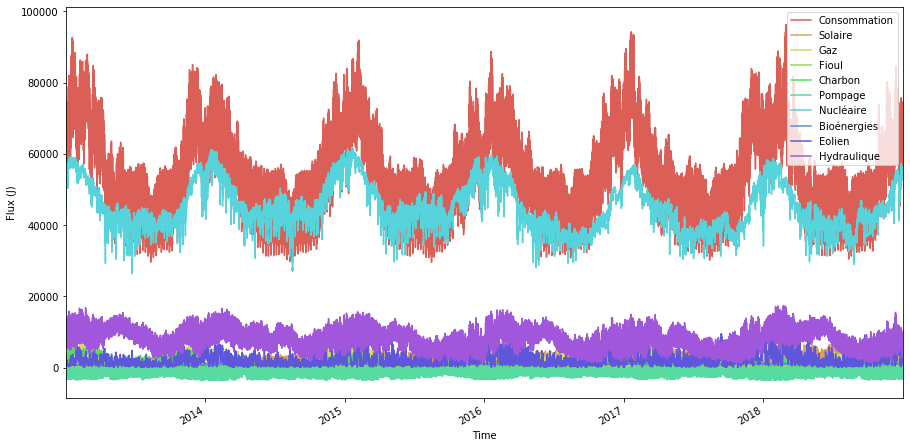

In [20]:
source_energies={'Fioul','Charbon','Gaz','Nucléaire','Eolien','Solaire','Hydraulique','Pompage','Bioénergies'}

fig = plt.figure()
df_national_temp=df_national.dropna().copy()
df_national_temp['Consommation'].plot()
for energie in source_energies:
    df_national_temp[energie].plot()
plt.xlabel('Time')
plt.ylabel('Flux (J)')
plt.legend()
plt.show()

Nuclear energy accounts for a large part of the energy mix (shocker!). Pompage is negative: used as energy sotorage in case of surplus.

/home/campus-5/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


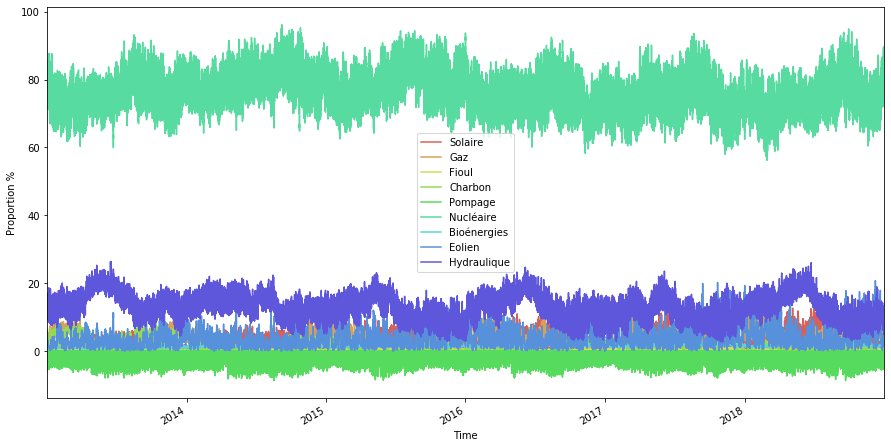

In [21]:
source_energies={'Fioul','Charbon','Gaz','Nucléaire','Eolien','Solaire','Hydraulique','Pompage','Bioénergies'}

fig = plt.figure()
df_national_temp=df_national.dropna().copy()
# df_national_temp['Consommation'].plot()
for energie in source_energies:
    (df_national_temp[energie]/(df_national_temp['Consommation']-df_national_temp['Ech. physiques'])*100).plot(label=energie)
plt.xlabel('Time')
plt.ylabel('Proportion %')
plt.legend()
plt.show()

/home/campus-5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


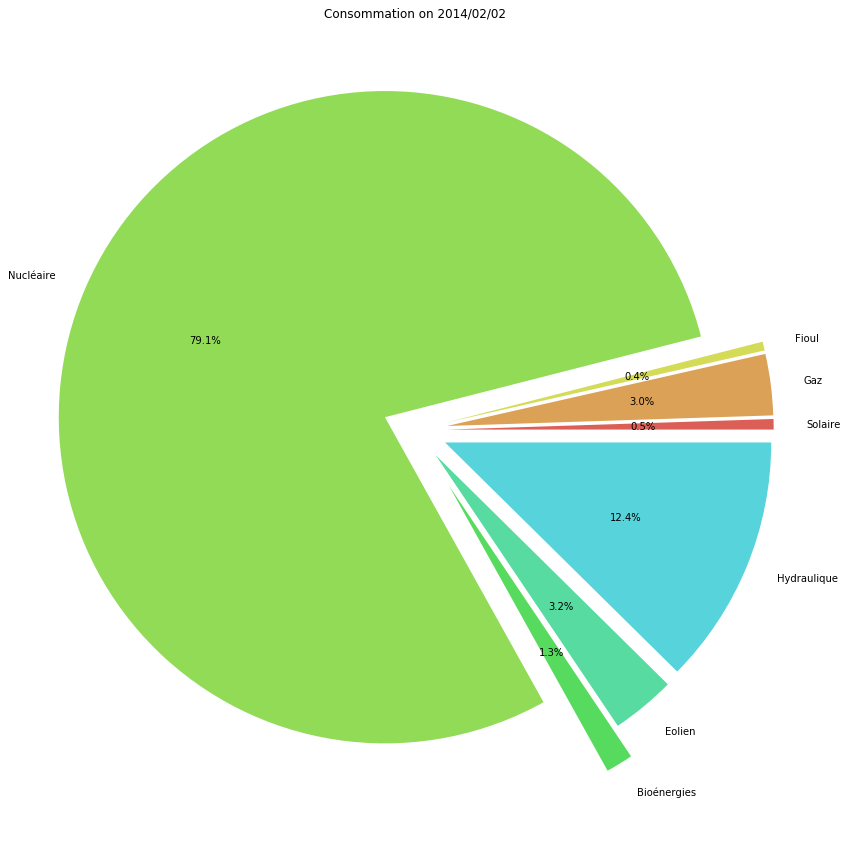

In [56]:
source_energies={'Fioul','Gaz','Nucléaire','Eolien','Solaire','Hydraulique','Bioénergies'}

fig = plt.figure(figsize=(15,15))
df_national_temp=df_national.dropna().copy()
explode = (0.1, 0.1, 0.1, 0.1,0.2,0.1,0.1)

# df_national_temp['Consommation'].plot()

plt.pie(df_national_temp.loc['2014-02-02',source_energies].resample('D').sum(),labels=source_energies,explode=explode,autopct='%1.1f%%')
plt.title('Consommation on 2014/02/02')
plt.show()

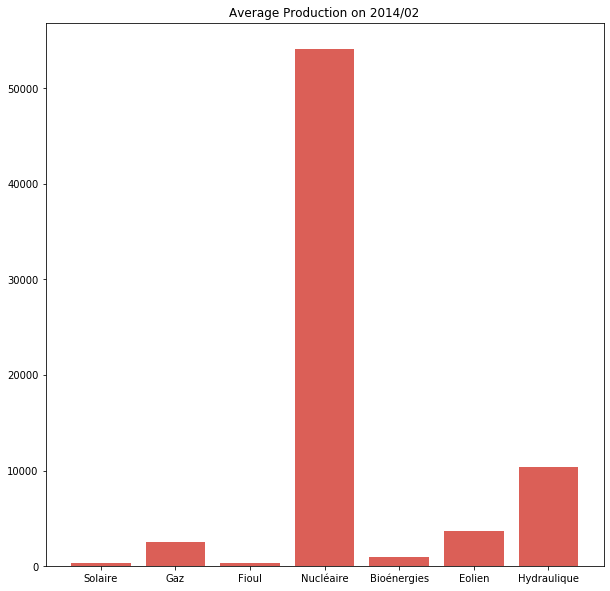

In [140]:
columns=df_national_temp.loc['2014-02',source_energies].resample('M').mean().T.index
df_test=pd.DataFrame({'Source':columns})
df_test['Values']=df_national_temp.loc['2014-02',source_energies].resample('M').mean().T.values

fig = plt.figure(figsize=(10,10))
df_national_temp=df_national.dropna().copy()


# df_national_temp['Consommation'].plot()

plt.bar(df_test.Source,df_test.Values)
plt.title('Average Production on 2014/02')
plt.show()

In [122]:
height=df_national_temp.loc['2014-02-02',source_energies].resample('D').sum().T.values
height

array([[  17443.],
       [ 102303.],
       [  14791.],
       [2672090.],
       [  45423.],
       [ 107392.],
       [ 418737.]])

In [132]:
columns=df_national_temp.loc['2014-02-02',source_energies].resample('D').sum().T.index
df_test=pd.DataFrame({'Source':columns})
df_test['Values']=df_national_temp.loc['2014-02-02',source_energies].resample('D').sum().T.values
df_test.dtypes

Source     object
Values    float64
dtype: object

In [98]:
df_national_temp.loc['2014-02-02',source_energies].resample('D').sum().values

array([[  17443.,  102303.,   14791., 2672090.,   45423.,  107392.,
         418737.]])

In [87]:
df_national_temp.loc['2014-02-02',source_energies].resample('D').sum().columns

Index(['Solaire', 'Gaz', 'Fioul', 'Nucléaire', 'Bioénergies', 'Eolien',
       'Hydraulique'],
      dtype='object')

In [106]:
df_national_temp.loc['2014-02-02',source_energies].resample('D').sum().T.values.shape

(7, 1)

Proportion of each enery in the toral energy mix. Note that exchanges with foreign countries are not taken in account (ploted data is consumption in France-Exchange).

### Comparaison Fioul avec sous catégories

In [ ]:
# fig = plt.figure()
# df_national_temp=df_national.dropna().copy()
# #df_national_temp['Consommation'].plot()
# for colonne in df_national_temp.columns:
#     if 'Fioul' in colonne:
#         df_national_temp[colonne].plot()
# plt.xlabel('Time')
# plt.ylabel('Flux (J)')
# plt.legend()
# plt.show()

In [ ]:
df_national[['Ech. physiques','Ech. comm. Angleterre','Ech. comm. Espagne','Ech. comm. Allemagne-Belgique']]

Ech. physiques = -(Ech Angleterre + Ech Espagne + Ech Allem-Belg)

### Echange aux frontières

Afficher, sur un même graphique: la production nucléaire, la consommation, et la somme des échanges aux frontières. En déduire la signification du signe des échanges (positif ou négatif) ?


In [ ]:
fig = plt.figure()
df_national_temp=df_national.dropna().copy()
df_national_temp['Consommation'].plot()
df_national_temp['Nucléaire'].plot()
df_national_temp['Ech. physiques'].plot()
# for colonne in df_national_temp.columns:
#     if 'Ech. comm' in colonne:
#         df_national_temp[colonne].plot()
plt.xlabel('Time')
plt.ylabel('Flux (J)')
plt.legend()
plt.show()

Ech. physiques est négatif si on envoie de l'énergie à l'extérieur du pays, et vice-versa.b

In [ ]:
fig = plt.figure()
df_national_temp=df_national.dropna().copy()
# df_national_temp['Consommation'].plot()
# df_national_temp['Nucléaire'].plot()
df_national_temp['Ech. physiques'].plot()
df_national_temp['somme_echange']=0.0
for colonne in df_national_temp.columns:
    if 'Ech. comm' in colonne:
        df_national_temp['somme_echange']+=df_national_temp[colonne]
df_national_temp['somme_echange'].plot()
plt.xlabel('Time')
plt.ylabel('Flux (J)')
plt.legend()
plt.show()

Ech. physiques est la somme des échanges à chaque frontières. Ainsi un signe négatif indique que la France envoit de l'énergie vers ce pays.

Quelles sources ont un fonctionnement de "base" (production régulière) ?
    de "pointe" (production ponctuelle, uniquement lorsque la base ne suffit plus) ?

In [ ]:
liste_to_display=list(df_national_temp.loc[:,'Fioul':'Bioénergies'].columns)
liste_to_display.append('Consommation')

In [ ]:
df_national_temp.loc['2015-02',liste_to_display].plot()

Exemple du mois de février 2015 sur le territoire national : Nucléaire a un fonctionnement de base, renouvelables dépendent de l'heure de la journée. L'hydraulique semble avoir un fonctionnement de lissage pour compenser la demande rapidement. Le gaz a un peu le même rôle mais en journée seulement.


### Comparaison des situations régionales

**TODO**

<font color=#cc0066>
    
1. Autonomie électrique des régions: 
    - Afficher la 'consommation - sum(productions)' pour chaque région
    - Quelles régions sont autonomes ? en exces ? en déficit ?
    - Comparer ce résultat à la colonne 'Ech. physiques'
    - Bonus: reconstruire les flux inter-régionaux ...

    
2. Etude de la production solaire:
    - Quelle région produit le plus (en moyenne et au max) ? 
    - Quelle évolution ces dernières années ?
    - Quelle région a le meilleur taux 'énergie produite / puissance installée' ? (la puissance installée peut être assimilée au maximum produit, attention cette capacité peut augmenter dans le temps...)

    
3. Mêmes questions pour l'éolien
    


</font>

**Aide**

<font color=#0033cc>

- Les méthodes groupby, unstack, ou pivot sont très utiles pour manipuler des dataframes

</font>

In [ ]:
df_regional.head()

In [ ]:
source_energies_regional={'Thermique','Nucléaire','Eolien','Solaire','Hydraulique','Pompage','Bioénergies'}
# df_regional['Production']=df_regional['Thermique']+df_regional['Eolien']
df_regional['Production']=0.0
for ener in source_energies_regional:
    df_regional['Production']+=df_regional[ener].fillna(0)
df_regional['Besoin_E']=df_regional['Consommation']-df_regional['Production']

In [ ]:
df_regional.tail()

In [ ]:
fig = plt.figure()
df_regional_temp=df_regional.copy()
df_regional_temp=df_regional_temp.dropna(subset=['Consommation'])
df_regional_temp.groupby('Périmètre').Besoin_E.plot()

plt.xlabel('Time')
plt.ylabel('Consommation - Production')
plt.legend()
plt.show()



Consommation - Production (defined as extra Energy needed) for all regions. Paris area is always in need of a lot of energy, therefore some other regions have negative extre energy, meaning that they produce and export to neighbours.

In [ ]:
fig = plt.figure()
df_regional_temp=df_regional.copy()
df_regional_temp=df_regional_temp.dropna(subset=['Consommation'])

df_regional_temp.groupby('Datetime').Besoin_E.sum().plot(alpha=.3)
(df_regional_temp.groupby('Datetime')['Ech. physiques'].sum()+5000).plot(alpha=.5)

plt.xlabel('Time')
plt.ylabel('Energy (a.u.)')
plt.legend()
plt.show()

Extra energy needed at national level, defined as consumption minus production for all regions at given times, is exactly the same as the physical exchange. 

In [ ]:
liste_to_display=list(df_regional.loc[:,'Consommation':'Bioénergies'].columns)
df_test = df_regional.loc[df_regional.Périmètre=='Auvergne-Rhône-Alpes'].loc['2015-02',liste_to_display]

In [ ]:
#Remove only columns that contains full NaN (Pompage here)
df_test.dropna(axis=0, how='all').plot()


Mois de février 2015 pour la région Rhône Alpes. On retrouve le lissage par hydraulique. Rien que le nucléaire est supérieur à la consommation : Rhône Alpes est un exporteur d'énergie.

In [ ]:
x=df_regional.groupby('Périmètre').resample('M').Production.mean()
x.unstack('Périmètre').plot()

Production moyenne par mois pour chaque régions. Les pics hivernaux sont évidents, ainsi que les grosses réiong productrices et les dépendantes.

In [ ]:
_=df_regional.groupby('Périmètre').resample('M').Besoin_E.mean()
_.unstack('Périmètre').plot()

Extra energy needed for each regions, averaged over months. Paris area is in need of a large quantity of energy. Regions at the bottom of the graph are compensating dor dependant ones.

In [ ]:
x=df_regional.groupby('Périmètre').resample('M').Besoin_E.mean()
x.unstack('Périmètre').loc['2013'].plot()

Zoom on 2013.

### Etude des consommations 

**TODO**

<font color=#cc0066>

1. Afficher les moyennes des consommations régionnales pour chaque année, avec et sans standardisation. Quelle info visualisez vous ?
    
2. Faire pareil avec la moyenne de consommation selon le jour de la semaine.

3. Tracer les consommations horaires moyenne par région en décembre et en juin. Peut-on observer les différences d'ensoleillement entre les régions ?

4. Tracer ces mêmes courbes, en ne sélectionnant que les jours de semaine, puis que les jours de week end. Quelles différences de comportement peu-on observer ?
    
</font>

**Aide**

<font color=#0033cc>

- un DatetimeIndex possède de nombreux attributs et méthodes utiles: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html
- Regarder la doc des méthodes groupby, unstack, pivot...
- Si besoin, utiliser la méthode seaborn.heatmap pour visualiser vos résultats (cmap="YlGnBu")
</font>


In [ ]:
x=df_regional.groupby('Périmètre').resample('M').Consommation.mean()
x.unstack('Périmètre').plot()

Moyenne mensuelle de la consommation pour chaque régions.

In [ ]:
x=df_regional_n.groupby('Périmètre').resample('M').Consommation.mean()
x.unstack('Périmètre').plot()

Moyenne mensuelle pour la data normalisée.

In [ ]:
x=df_regional_s.groupby('Périmètre').resample('M').Consommation.mean()
x.unstack('Périmètre').plot()

Moyenne mensuelle pour la data standardisée.

In [ ]:
x=df_regional.groupby('Périmètre').resample('H').Consommation.mean()
x.unstack('Périmètre').loc['2015-02-01':'2015-02-08'].plot()

In [ ]:
x=df_regional_s.groupby('Périmètre').resample('H').Consommation.mean()
x.unstack('Périmètre').loc['2015-02-01':'2015-02-08'].plot()